In [139]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

#定义网络模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#平铺，展平数据
model.add(layers.Flatten())

#添加1个Dropout层
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


#加载数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#准备验证集
#x_val = train_images[:20000]
#partial_x_train = train_images[20000:]

#y_val = train_labels[:20000]
#partial_y_train = train_labels[20000:]


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

#history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
22976/60000 [==========>...................] - ETA: 24:09 - loss: 2.3145 - acc: 0.06 - ETA: 8:27 - loss: 2.2604 - acc: 0.1302 - ETA: 6:33 - loss: 2.2217 - acc: 0.168 - ETA: 4:33 - loss: 2.1543 - acc: 0.237 - ETA: 3:32 - loss: 2.0945 - acc: 0.279 - ETA: 2:55 - loss: 1.9778 - acc: 0.339 - ETA: 2:31 - loss: 1.9021 - acc: 0.378 - ETA: 2:14 - loss: 1.8420 - acc: 0.390 - ETA: 2:08 - loss: 1.8239 - acc: 0.390 - ETA: 1:57 - loss: 1.7614 - acc: 0.413 - ETA: 1:48 - loss: 1.6950 - acc: 0.435 - ETA: 1:41 - loss: 1.6150 - acc: 0.466 - ETA: 1:35 - loss: 1.5633 - acc: 0.482 - ETA: 1:30 - loss: 1.4917 - acc: 0.507 - ETA: 1:26 - loss: 1.4402 - acc: 0.525 - ETA: 1:22 - loss: 1.3936 - acc: 0.540 - ETA: 1:18 - loss: 1.3425 - acc: 0.559 - ETA: 1:16 - loss: 1.3018 - acc: 0.574 - ETA: 1:13 - loss: 1.2783 - acc: 0.581 - ETA: 1:11 - loss: 1.2366 - acc: 0.593 - ETA: 1:10 - loss: 1.2185 - acc: 0.598 - ETA: 1:09 - loss: 1.2025 - acc: 0.603 - ETA: 1:09 - loss: 1.1872 - acc: 0.609 - ETA: 1:07 - loss: 1.15

In [124]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 232us/step


In [125]:
print('test_acc:', test_acc)

test_acc: 0.9887


In [126]:
history_dict = history.history

In [127]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

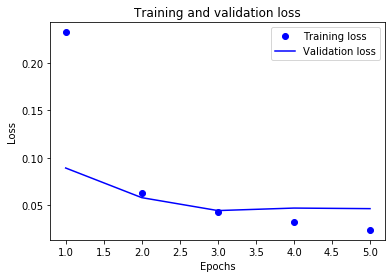

In [128]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

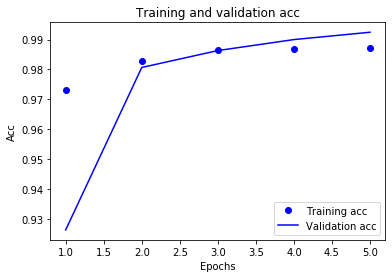

In [129]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, val_acc, 'bo', label='Training acc')
plt.plot(epochs, acc, 'b', label='Validation acc')

plt.title('Training and validation acc')

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend()

plt.show()

In [130]:
predictions = model.predict(test_images)

In [146]:
print(predictions)

[[2.53999460e-10 3.13443649e-09 1.13098464e-08 ... 1.00000000e+00
  1.14483745e-09 3.00820311e-08]
 [7.86611736e-08 3.69769464e-06 9.99996185e-01 ... 8.06958056e-09
  2.84115362e-08 4.13955599e-13]
 [1.14044463e-09 9.99811947e-01 4.80392437e-09 ... 1.12551425e-04
  2.76754099e-06 5.21817753e-07]
 ...
 [9.88247845e-16 1.55450704e-11 3.51570395e-16 ... 2.98323484e-11
  4.88785012e-10 6.33079411e-09]
 [9.11740905e-09 1.08507071e-10 6.55652290e-13 ... 3.31231287e-09
  2.15885734e-06 1.69374251e-10]
 [1.36937910e-08 5.68056935e-10 1.15511334e-09 ... 1.53420720e-13
  2.79600870e-10 3.93418353e-11]]


In [132]:
predictions[0].shape

(10,)

In [133]:
np.sum(predictions)

10000.0

In [140]:
np.argmax(predictions[5])

1

In [141]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

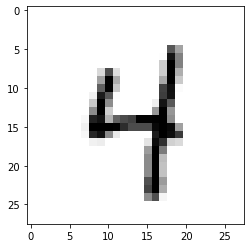

In [144]:
tes = test_images[19]

plt.imshow(tes, cmap=plt.cm.binary)
plt.show()

In [145]:
np.argmax(predictions[19])

4